In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
from torchvision import transforms, datasets
import cv2
from torchvision import transforms, datasets
import pandas as pd
import os
from glob import glob

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)

Using Pytorch version :  1.10.0  Device :  cuda


In [8]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=50000
win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.

pathology_sig=[]
healthy_sig=[]

pathology=[]
healthy=[]


#PATHOLOGY DATA
for audio_path in os.listdir('../voice_data/pathology_a/export/'):
    sig, sr = librosa.load('../voice_data/pathology_a/export/'+audio_path, sr=50000)# 논문에서 f_s = 50 000HZ
    pathology_sig.append(sig)
    MFCCs = librosa.feature.mfcc(sig, sr, win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=100)
    pathology.append(MFCCs)
    

#Healthy data
for audio_path in os.listdir('../voice_data/healthy_a/export/'):
    sig, sr = librosa.load('../voice_data/healthy_a/export/'+audio_path, sr=50000)# 논문에서 f_s = 50 000HZ
    healthy_sig.append(sig)
    MFCCs = librosa.feature.mfcc(sig, sr, win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=100)
    healthy.append(MFCCs)
    
print("pathology data 수 : ",len(pathology))
print("healthy data 수 : ",len(healthy))


path_max=max([ len(samples) for samples in pathology_sig])
healthy_max=max([ len(samples) for samples in healthy_sig])
print("가장 긴 path sample :" ,path_max)
print("가장 긴 healthy sample :" ,healthy_max)

pathology data 수 :  1354
healthy data 수 :  687
가장 긴 path sample : 131655
가장 긴 healthy sample : 219501


In [9]:
print(path_max/sr,"초")
print(healthy_max/sr,"초")

2.6331 초
4.39002 초


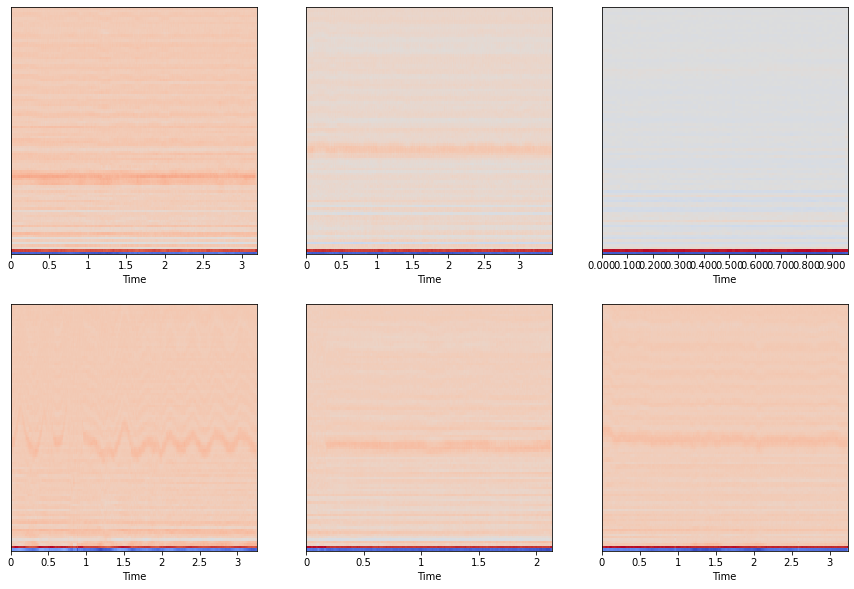

In [10]:
fig = plt.figure(figsize=(15,10))
plt.subplot(231)
librosa.display.specshow(healthy[0], sr=50000, x_axis='time')
plt.subplot(232)
librosa.display.specshow(healthy[1], sr=50000, x_axis='time')
plt.subplot(233)
librosa.display.specshow(healthy[2], sr=50000, x_axis='time')

plt.subplot(234)
librosa.display.specshow(pathology[0], sr=50000, x_axis='time')
plt.subplot(235)
librosa.display.specshow(pathology[1], sr=50000, x_axis='time')
plt.subplot(236)
librosa.display.specshow(pathology[2], sr=50000, x_axis='time')

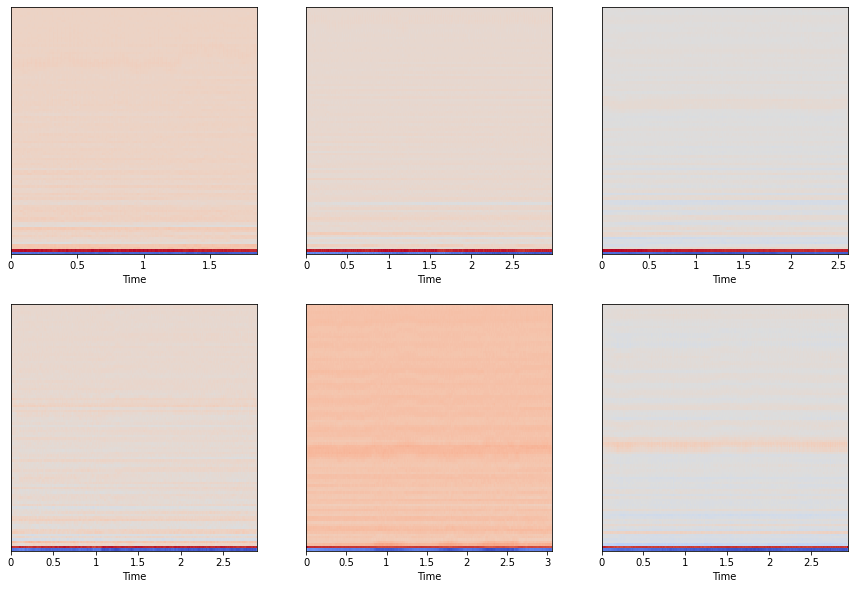

In [11]:
fig = plt.figure(figsize=(15,10))
plt.subplot(231)
librosa.display.specshow(healthy[3], sr=50000, x_axis='time')
plt.subplot(232)
librosa.display.specshow(healthy[4], sr=50000, x_axis='time')
plt.subplot(233)
librosa.display.specshow(healthy[5], sr=50000, x_axis='time')

plt.subplot(234)
librosa.display.specshow(pathology[3], sr=50000, x_axis='time')
plt.subplot(235)
librosa.display.specshow(pathology[4], sr=50000, x_axis='time')
plt.subplot(236)
librosa.display.specshow(pathology[5], sr=50000, x_axis='time')

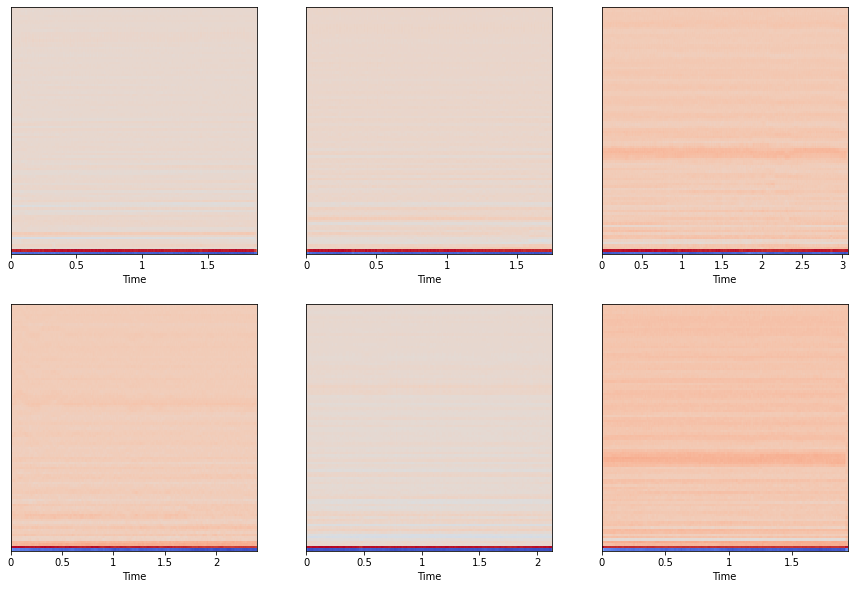

In [12]:
fig = plt.figure(figsize=(15,10))
plt.subplot(231)
librosa.display.specshow(healthy[6], sr=50000, x_axis='time')
plt.subplot(232)
librosa.display.specshow(healthy[7], sr=50000, x_axis='time')
plt.subplot(233)
librosa.display.specshow(healthy[8], sr=50000, x_axis='time')

plt.subplot(234)
librosa.display.specshow(pathology[6], sr=50000, x_axis='time')
plt.subplot(235)
librosa.display.specshow(pathology[7], sr=50000, x_axis='time')
plt.subplot(236)
librosa.display.specshow(pathology[8], sr=50000, x_axis='time')